In [18]:
import tensorflow as tf
import time
from datetime import timedelta
import math
import numpy as np
import os
import glob
import sys
import scipy.misc
from scipy.ndimage import imread
import math
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def get_img_array(path):
    """
    Given path of image, returns it's numpy array
    """
    return scipy.misc.imread(path)

def get_files(folder):
    """
    Given path to folder, returns list of files in it
    """
    filenames = [file for file in glob.glob(folder+'*/*')]
    filenames.sort()
    return filenames

def get_label(filepath, label2id):
    """
    Files are assumed to be labeled as: /path/to/file/999_frog.png
    Returns label for a filepath
    """
    tokens = filepath.split('/')
    label = tokens[-1].split('_')[1][:-4]
    if label in label2id:
        return label2id[label]
    else:
        sys.exit("Invalid label: " + label)
        

def get_labels(folder, label2id):
    """
    Returns vector of labels extracted from filenames of all files in folder
    :param folder: path to data folder
    :param label2id: mapping of text labels to numeric ids. (Eg: automobile -> 0)
    """
    files = get_files(folder)
    y = []
    for f in files:
        y.append(get_label(f,label2id))
    return np.array(y)

def one_hot(y, num_classes=10):
    """
    Converts each label index in y to vector with one_hot encoding
    One-hot encoding converts categorical labels to binary values
    """
    y_one_hot = np.zeros((num_classes, y.shape[0]))
    y_one_hot[y, range(y.shape[0])] = 1
    return y_one_hot

def get_label_mapping(label_file):
    """
    Returns mappings of label to index and index to label
    The input file has list of labels, each on a separate line.
    """
    print(os.listdir())
    with open(label_file, 'r') as f:
        id2label = f.readlines()
        id2label = [l.strip() for l in id2label]
    label2id = {}
    count = 0
    for label in id2label:
        label2id[label] = count
        count += 1
    return id2label, label2id

def get_images(folder):
    """
    returns numpy array of all samples in folder
    each column is a sample resized to 30x30 and flattened
    """
    files = get_files(folder)
    images = []
    count = 0
    
    for f in files:
        count += 1 
        if count % 10000 == 0:
            print("Loaded {}/{}".format(count,len(files)))
        img_arr = get_img_array(f)
        img_arr = img_arr.flatten() / 255.0
        images.append(img_arr)
    X = np.column_stack(images)

    return X

def get_train_data(data_root_path):
    """
    Return X and y
    """
    train_data_path = data_root_path + 'train'
    id2label, label2id = get_label_mapping(data_root_path+'labels.txt')
    print(label2id)
    X = get_images(train_data_path)
    y = get_labels(train_data_path, label2id)
    return X, y

def save_predictions(filename, y):
    """
    Dumps y into .npy file
    """
    np.save(filename, y)
    
def get_batch(X, y, batch_size):
    """
    Return minibatch of samples and labels
  
    :param X, y: samples and corresponding labels
    :parma batch_size: minibatch size
    :returns: (tuple) X_batch, y_batch
    """
    # Random indices for the samples

    indices = np.random.randint(y.shape[0]-1, size= batch_size)

    X_batch = X[indices, :]
    y_batch = y[indices, :]
  
    return X_batch, y_batch

# Load the data
data_root_path = 'HW2_data/'
X_train, y_train = get_train_data(data_root_path) # this may take a few minutes
#y_train = one_hot(y_train).T
X_train = X_train.T
print("Data loading done.")

['.DS_Store', '.ipynb_checkpoints', 'CNN.ipynb', 'HW2_data', 'train.py']
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


Loaded 10000/45000
Loaded 20000/45000
Loaded 30000/45000
Loaded 40000/45000
Data loading done.


In [16]:
X_train = X_train.reshape(45000,32,32,3)

In [14]:
y_train.shape

(45000,)

In [6]:
# define net
class CifarNet():
    def __init__(self):
        self.Wconv1 = tf.get_variable("Wconv1", shape=[5, 5, 3, 32])
        self.bconv1 = tf.get_variable("bconv1", shape=[32])
        self.Wconv2 = tf.get_variable("Wconv2", shape=[5, 5, 32, 64])
        self.bconv2 = tf.get_variable("bconv2", shape=[64])
        
        self.W1 = tf.get_variable("W1", shape=[3136, 1024])
        self.b1 = tf.get_variable("b1", shape=[1024])
        self.W2 = tf.get_variable("W2", shape=[1024, 10])
        self.b2 = tf.get_variable("b2", shape=[10])        
        
    def forward(self, X, y, is_training):
        # conv2d
        # ReLu
        # conv2d
        # ReLu
        # maxpool
        # Batch Norm
        # Affine
        # Batch Norm
        # ReLu
        # Affine
        # dropout
        # Batch Norm

        # define our graph (e.g. two_layer_convnet) with stride 1
        conv1 = tf.nn.conv2d(X, self.Wconv1, strides=[1, 1, 1, 1], padding='SAME') + self.bconv1
        print(conv1.shape)
        # ReLU Activation Layer
        relu1 = tf.nn.relu(conv1)
        print(relu1)
        # Conv
        conv2 = tf.nn.conv2d(relu1, self.Wconv2, strides=[1, 2, 2, 1], padding='VALID') + self.bconv2
        print(conv2.shape)
        # ReLU Activation Layer
        relu2 = tf.nn.relu(conv2)
        print(relu2)
        # 2x2 Max Pooling layer with a stride of 2
        maxpool = tf.layers.max_pooling2d(relu2, pool_size=(2,2), strides=2)
        print(maxpool.shape)
        maxpool_flat = tf.reshape(maxpool,[-1,3136])
        # Spatial Batch Normalization Layer (trainable parameters, with scale and centering)
        bn1 = tf.layers.batch_normalization(inputs=maxpool_flat, center=True, scale=True, training=is_training)
        # Affine layer with 1024 output units
        affine1 = tf.matmul(bn1, self.W1) + self.b1
        print(affine1.shape)
        # vanilla batch normalization
        affine1_flat = tf.reshape(affine1,[-1,1024])
        bn2 = tf.layers.batch_normalization(inputs=affine1, center=True, scale=True, training=is_training)
        print(bn2.shape)
        # ReLU Activation Layer
        relu2 = tf.nn.relu(bn2)
        print(relu2.shape)
        # dropout
        drop1 = tf.layers.dropout(inputs=relu2, training=is_training)
        # Affine layer from 1024 input units to 10 outputs
        affine2 = tf.matmul(drop1, self.W2) + self.b2
        # vanilla batch normalization
        affine2_flat = tf.reshape(affine2,[-1,3136])
        self.predict = tf.layers.batch_normalization(inputs=affine2, center=True, scale=True, training=is_training)
        print(self.predict.shape)
        return self.predict
    
    def run(self, session, loss_val, Xd, yd,
                  epochs=1, batch_size=64, print_every=100,
                  training=None, plot_losses=False, isSoftMax=False):
        # have tensorflow compute accuracy
        if isSoftMax:
            correct_prediction = tf.nn.softmax(self.predict)
        else:
            correct_prediction = tf.equal(tf.argmax(self.predict,1), y)
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        # shuffle indicies
        train_indicies = np.arange(Xd.shape[0])
        np.random.shuffle(train_indicies)

        training_now = training is not None

        # setting up variables we want to compute (and optimizing)
        # if we have a training function, add that to things we compute
        variables = [mean_loss, correct_prediction, accuracy]
        if training_now:
            variables[-1] = training

        # counter 
        iter_cnt = 0
        for e in range(epochs):
            # keep track of losses and accuracy
            correct = 0
            losses = []
            # make sure we iterate over the dataset once
            for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
                # generate indicies for the batch
                start_idx = (i*batch_size)%Xd.shape[0]
                idx = train_indicies[start_idx:start_idx+batch_size]

                # create a feed dictionary for this batch
                feed_dict = {X: Xd[idx,:],
                             y: yd[idx],
                             is_training: training_now }
                # get batch size
                actual_batch_size = yd[idx].shape[0]

                # have tensorflow compute loss and correct predictions
                # and (if given) perform a training step
                loss, corr, _ = session.run(variables,feed_dict=feed_dict)

                # aggregate performance stats
                losses.append(loss*actual_batch_size)
                correct += np.sum(corr)

                # print every now and then
                if training_now and (iter_cnt % print_every) == 0:
                    print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                          .format(iter_cnt,loss,np.sum(corr)/actual_batch_size))
                iter_cnt += 1
            total_correct = correct/Xd.shape[0]
            total_loss = np.sum(losses)/Xd.shape[0]
            print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"\
                  .format(total_loss,total_correct,e+1))
            if plot_losses:
                plt.plot(losses)
                plt.grid(True)
                plt.title('Epoch {} Loss'.format(e+1))
                plt.xlabel('minibatch number')
                plt.ylabel('minibatch loss')
                plt.show()
        return total_loss, total_correct

In [9]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int64, [None])
is_training = tf.placeholder(tf.bool)

net = CifarNet()
net.forward(X,y,is_training)

(?, 32, 32, 32)
Tensor("Relu:0", shape=(?, 32, 32, 32), dtype=float32)
(?, 14, 14, 64)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
(?, 7, 7, 64)
(?, 1024)
(?, 1024)
(?, 1024)
(?, 10)


<tf.Tensor 'batch_normalization_3/cond/Merge:0' shape=(?, 10) dtype=float32>

In [20]:
global_step = tf.Variable(0, trainable=False)
starter_learning_rate = 1e-3
end_learning_rate = 5e-3
decay_steps = 10000

learning_rate = tf.train.polynomial_decay(starter_learning_rate, global_step,
                                          decay_steps, end_learning_rate,
                                          power=0.5)

exp_learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                               100000, 0.96, staircase=True)


# Feel free to play with this cell
mean_loss = None
optimizer = None

# define our loss
cross_entr_loss = tf.nn.softmax_cross_entropy_with_logits(labels=tf.one_hot(y,10), logits=net.predict)
mean_loss = tf.reduce_mean(cross_entr_loss)

# define our optimizer
optimizer = tf.train.GradientDescentOptimizer(exp_learning_rate)


# batch normalization in tensorflow requires this extra dependency
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(extra_update_ops):
    train_step = optimizer.minimize(mean_loss, global_step=global_step)

Training
Iteration 0: with minibatch training loss = 2.72 and accuracy of 0.094
Iteration 200: with minibatch training loss = 1.92 and accuracy of 0.25
Iteration 400: with minibatch training loss = 1.95 and accuracy of 0.22
Iteration 600: with minibatch training loss = 1.91 and accuracy of 0.27
Epoch 1, Overall loss = 2.04 and accuracy of 0.266


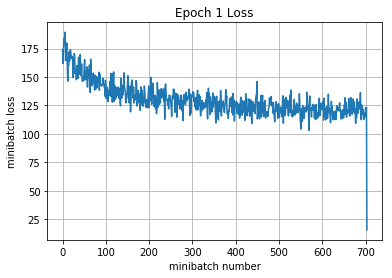

Iteration 800: with minibatch training loss = 1.74 and accuracy of 0.42
Iteration 1000: with minibatch training loss = 1.6 and accuracy of 0.48
Iteration 1200: with minibatch training loss = 1.77 and accuracy of 0.38
Iteration 1400: with minibatch training loss = 1.57 and accuracy of 0.39
Epoch 2, Overall loss = 1.8 and accuracy of 0.356


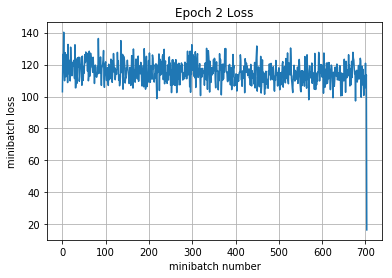

Iteration 1600: with minibatch training loss = 1.53 and accuracy of 0.53
Iteration 1800: with minibatch training loss = 1.79 and accuracy of 0.39
Iteration 2000: with minibatch training loss = 1.95 and accuracy of 0.27
Epoch 3, Overall loss = 1.73 and accuracy of 0.391


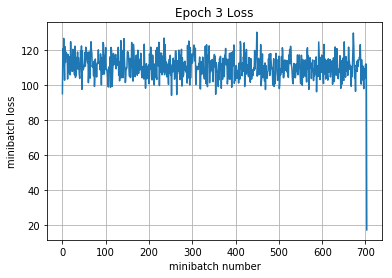

Iteration 2200: with minibatch training loss = 1.79 and accuracy of 0.34
Iteration 2400: with minibatch training loss = 1.59 and accuracy of 0.42
Iteration 2600: with minibatch training loss = 1.73 and accuracy of 0.39
Iteration 2800: with minibatch training loss = 1.8 and accuracy of 0.31
Epoch 4, Overall loss = 1.68 and accuracy of 0.413


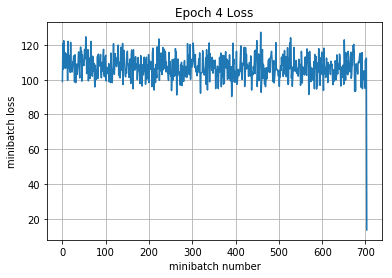

Iteration 3000: with minibatch training loss = 1.5 and accuracy of 0.56
Iteration 3200: with minibatch training loss = 1.77 and accuracy of 0.33
Iteration 3400: with minibatch training loss = 1.6 and accuracy of 0.48
Epoch 5, Overall loss = 1.64 and accuracy of 0.432


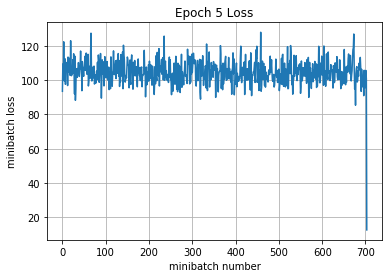

Iteration 3600: with minibatch training loss = 1.46 and accuracy of 0.55
Iteration 3800: with minibatch training loss = 1.55 and accuracy of 0.53
Iteration 4000: with minibatch training loss = 1.62 and accuracy of 0.44
Iteration 4200: with minibatch training loss = 1.64 and accuracy of 0.39
Epoch 6, Overall loss = 1.6 and accuracy of 0.444


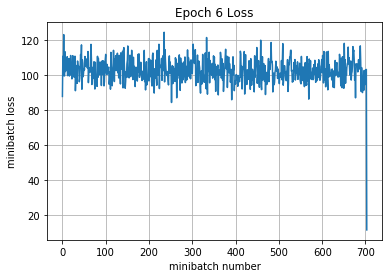

Iteration 4400: with minibatch training loss = 1.59 and accuracy of 0.42
Iteration 4600: with minibatch training loss = 1.64 and accuracy of 0.48
Iteration 4800: with minibatch training loss = 1.62 and accuracy of 0.38
Epoch 7, Overall loss = 1.58 and accuracy of 0.453


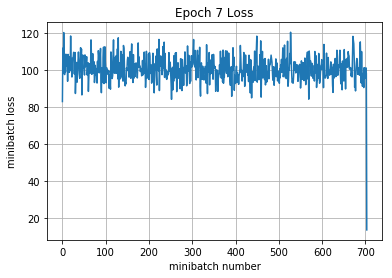

Iteration 5000: with minibatch training loss = 1.52 and accuracy of 0.48
Iteration 5200: with minibatch training loss = 1.39 and accuracy of 0.56
Iteration 5400: with minibatch training loss = 1.48 and accuracy of 0.44
Iteration 5600: with minibatch training loss = 1.78 and accuracy of 0.33
Epoch 8, Overall loss = 1.55 and accuracy of 0.462


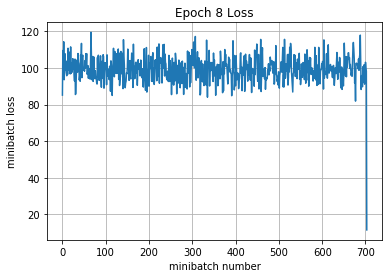

Iteration 5800: with minibatch training loss = 1.42 and accuracy of 0.48
Iteration 6000: with minibatch training loss = 1.5 and accuracy of 0.44
Iteration 6200: with minibatch training loss = 1.61 and accuracy of 0.45
Epoch 9, Overall loss = 1.53 and accuracy of 0.472


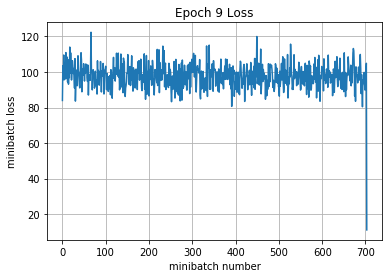

Iteration 6400: with minibatch training loss = 1.48 and accuracy of 0.48
Iteration 6600: with minibatch training loss = 1.26 and accuracy of 0.61
Iteration 6800: with minibatch training loss = 1.52 and accuracy of 0.44
Iteration 7000: with minibatch training loss = 1.46 and accuracy of 0.5
Epoch 10, Overall loss = 1.5 and accuracy of 0.484


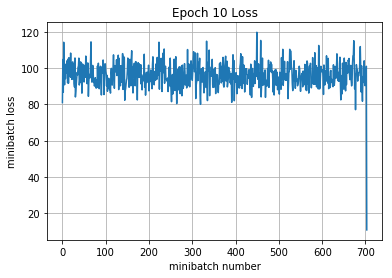

Validation


NameError: name 'X_val' is not defined

In [21]:
# train with 10 epochs
sess = tf.Session()

try:
    with tf.device("/cpu:0") as dev:
        sess.run(tf.global_variables_initializer())
        print('Training')
        net.run(sess, mean_loss, X_train, y_train, 10, 64, 200, train_step, True)
        print('Validation')
        net.run(sess, mean_loss, X_val, y_val, 1, 64)
except tf.errors.InvalidArgumentError:
    print("no gpu found, please use Google Cloud if you want GPU acceleration") 